In [2]:
import pandas as pd

#### **Домашнее задание**

**Задание 1**

Напишите функцию, которая классифицирует фильмы из материалов занятия по следующим правилам:
	- оценка 2 и меньше - низкий рейтинг
	- оценка 4 и меньше - средний рейтинг
	- оценка 4.5 и 5 - высокий рейтинг

Результат классификации запишите в столбец class

In [6]:
ratings = pd.read_csv('ratings.csv', encoding='utf-8')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [10]:
# 1 вариант: apply к одному столбцу

def film_rate(rating):
    if rating <= 2:
        return 'Low' 
    elif rating <= 4:
        return 'Middle'
    else:
        return 'High'

ratings['category'] = ratings['rating'].apply(film_rate)
ratings.head()

,userId,movieId,rating,timestamp,category
0,1,31,2.5,1260759144,Middle
1,1,1029,3.0,1260759179,Middle
2,1,1061,3.0,1260759182,Middle
3,1,1129,2.0,1260759185,Low
4,1,1172,4.0,1260759205,Middle


In [12]:
# 2 вариант: apply ко всей строке DF

def film_rate(row):
    if row.rating <= 2:
        return 'Low' 
    elif row.rating <= 4:
        return 'Middle'
    else:
        return 'High'

ratings.category = ratings.apply(film_rate, axis=1)
ratings.head()

,userId,movieId,rating,timestamp,category
0,1,31,2.5,1260759144,Middle
1,1,1029,3.0,1260759179,Middle
2,1,1061,3.0,1260759182,Middle
3,1,1129,2.0,1260759185,Low
4,1,1172,4.0,1260759205,Middle


#### **Задание 2**

Используем файл keywords.csv.

Необходимо написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определенному региону. Т. е. если поисковый запрос содержит название города региона, то в столбце 'region' пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим 'undefined'.

Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:

geo_data = {

    'Центр': ['москва', 'тула', 'ярославль'],

    'Северо-Запад': ['петербург', 'псков', 'мурманск'],

    'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']

}

Результат классификации запишите в отдельный столбец region.

In [13]:
data = pd.read_csv('keywords.csv', encoding='utf-8')
data.head()

,keyword,shows
0,вк,64292779
1,одноклассники,63810309
2,порно,41747114
3,ютуб,39995567
4,вконтакте,21014195


In [29]:
geo_data = {

'Центр': ['москва', 'тула', 'ярославль'],

'Северо-Запад': ['петербург', 'псков', 'мурманск'],

'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}
        
def geo_class(row):
    for key, value in geo_data.items():
        if row.keyword in list(value):
            return key
    return 'undefined'

data['region'] = data.apply(geo_class, axis=1)

In [31]:
# Проверка

geo_data_list = ['москва', 'тула', 'ярославль', 'петербург', 'псков', 'мурманск', 'владивосток', 'сахалин', 'хабаровск']
data[data.keyword.isin(geo_data_list)].head()

,keyword,shows,region
1259,москва,153050,Центр
5858,владивосток,43038,Дальний Восток
6075,ярославль,41720,Центр
8977,мурманск,29984,Северо-Запад
9084,хабаровск,29655,Дальний Восток


In [32]:
# Хотела сразу предать словарь в функцию, возникла ошибка при выполнении apply.
# Как правильно передавать словарь в функцию?

def geo_class(row, geo_data):
    for key, value in geo_data.items():
        if row.keyword in list(value):
            return key
    return 'undefined'

data['region'] = data.apply(geo_class, geo_data, axis=1)

TypeError: apply() got multiple values for argument 'axis'

#### **Задание 3 (бонусное)**

Есть мнение, что "раньше снимали настоящее кино, не то что сейчас". Ваша задача проверить это утверждение, используя файлы с рейтингами фильмов из прошлого домашнего занятия (файл ratings.csv из базы https://grouplens.org/datasets/movielens). Т. е. проверить верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

При этом мы не будем затрагивать субьективные факторы выставления этих рейтингов, а пройдемся по следующему алгоритму:

1. В переменную years запишите список из всех годов с 1950 по 2010.

2. Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:
	- для каждой строки пройдите по всем годам списка years
	- если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска
	- если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год

3. Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец 'year'

4. Посчитайте средний рейтинг всех фильмов для каждого значения столбца 'year' и отсортируйте результат по убыванию рейтинга


In [3]:
movies = pd.read_csv('movies.csv', encoding='utf-8')
ratings = pd.read_csv('ratings.csv', encoding='utf-8')

ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [48]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
year_list = []
import re
for el in movies['title']:
    if re.findall('\d{4}', el) != []:
        year_list.append(re.findall('\d{4}', el)[0])
    else: 
        year_list.append('1900')
year_list        
years = set(year_list)
years

{'1000',
 '1138',
 '1408',
 '1600',
 '1900',
 '1902',
 '1915',
 '1916',
 '1917',
 '1918',
 '1919',
 '1920',
 '1921',
 '1922',
 '1923',
 '1924',
 '1925',
 '1926',
 '1927',
 '1928',
 '1929',
 '1930',
 '1931',
 '1932',
 '1933',
 '1934',
 '1935',
 '1936',
 '1937',
 '1938',
 '1939',
 '1940',
 '1941',
 '1942',
 '1943',
 '1944',
 '1945',
 '1946',
 '1947',
 '1948',
 '1949',
 '1950',
 '1951',
 '1952',
 '1953',
 '1954',
 '1955',
 '1956',
 '1957',
 '1958',
 '1959',
 '1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2046',
 '3000',
 '5555'}

In [97]:
int(re.findall('\d{4}', 'Toy Story (1995)')[0]

'1995'

In [108]:
years = range(1950,2011)

def production_year(row):
    """Возвращает год, если он есть в названии фильма"""
    for year in years:
        if str(year) in row['title']:
            return year
    return 1900

In [75]:
joined = ratings.merge(movies, on='movieId', how='left')
joined['year'] = joined.apply(production_year, axis=1)
joined.head()

,userId,movieId,rating,timestamp,title,genres,year
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama,1995
1,1,1029,3.0,1260759179,Dumbo (1941),Animation|Children|Drama|Musical,1900
2,1,1061,3.0,1260759182,Sleepers (1996),Thriller,1996
3,1,1129,2.0,1260759185,Escape from New York (1981),Action|Adventure|Sci-Fi|Thriller,1981
4,1,1172,4.0,1260759205,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama,1989


In [111]:
a = joined.groupby('year').mean()[['rating']]

In [117]:
a.sort_values('rating', ascending=False).head()

,rating
year,
1957,4.014241
1972,4.011136
1952,4.000000
1954,3.994220
1951,3.983539


In [113]:
%matplotlib inline

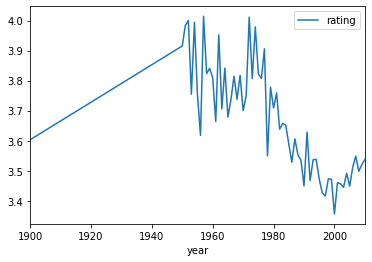

In [114]:
a.plot()

In [ ]:
"""
Выводы:
1. можно выделить 3 временных участка, где среднегодовой рейтинг показывал разные тенденции:

1950-~1970 - умеренное снижение рейтинга
~1970-2000 - выраженное снижение рейтинга
2000-2011 - выраженный рост рейтинга

В целом рейтинг последнего 10-летия ниже, чем рейтинг первого 10-летия в рассматриваемом временном отрезке, 
поэтому утверждение о том, что раньше фильмы были лучше можно считать близким к истине.

2. нужно иметь в виду, что фильмы, которые были отнесены к 1900 году выпуска, могут изменить показатели рейтинга 
при уточнении года выпуска.

"""